Explorando dados do Starbucks

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
import os
import sys
import importlib
import functions as aux_fun
importlib.reload(aux_fun)
from datetime import datetime as dti

Lendo os dados

In [3]:
# Lendo os dados

portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [4]:
cond = transcript.person == '94de646f7b6041228ca7dec82adb97d2'
# transcript.loc[cond]

Dicionário dos dados:  

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

In [5]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [6]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [7]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [8]:
portfolio.shape, profile.shape, transcript.shape

((10, 6), (17000, 5), (306534, 4))

Checando os usuários

,gender,age,id,became_member_on,income
1083,M,98,1083,20180410,52000.0
6847,F,98,6847,20160726,91000.0
10116,M,98,10116,20170518,64000.0
13214,F,98,13214,20180104,65000.0
14313,M,98,14313,20150403,37000.0


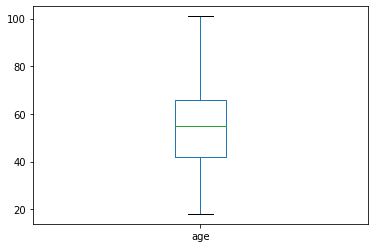

In [13]:
profile.loc[profile.age != 118].age.plot.box()
profile.loc[profile.age ==98]

Mapping to integer   

O código hexadecimal é grande para trabalhar

In [9]:
portfolio.id, dict_port_id = aux_fun.mapper_ids(portfolio.id)
profile.id, dict_prof_id = aux_fun.mapper_ids(profile.id)

In [10]:
transcript.person = transcript.person.map(dict_prof_id)

Olhada na timeline

In [86]:
# Por usuário
cond = transcript.person == 1510
transcript.loc[cond]

,person,event,value,time
1123,1510,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},0
15782,1510,offer viewed,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},6
31225,1510,transaction,{'amount': 27.95},54
31226,1510,offer completed,{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d...,54
38336,1510,transaction,{'amount': 27.84},84
69576,1510,transaction,{'amount': 31.75},174
81552,1510,transaction,{'amount': 17.17},204
99058,1510,transaction,{'amount': 30.49},270
111949,1510,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},336
127394,1510,offer viewed,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},342


Todos os usuários receberam ofertas?

In [12]:
transcript.loc[transcript.event=='offer received'].person.nunique() - profile.id.nunique() # .groupby('person', dropna=False).agg(count=('person','count')).sort_values('count')

# 6 usuários não receberam oferta

-6

Explorando a coluna value

In [12]:
# Abrindo a coluna de value

# offer_id é para ofertas completas e offer id é para ofertass enviadas

df_temp = pd.concat([transcript,pd.DataFrame(transcript.value.to_list())], axis=1)

df_temp.loc[transcript.event=='offer received']. \
    groupby(['person', 'offer id']).aggregate('count').iloc[100:110]



event  value  time  amount  offer_id  \
person offer id                                                                 
27     fafdcd668e3743c1bb461111dcafc2a4      1      1     1       0         0   
28     0b1e1539f2cc45b7b9fa7c272da2e1d7      2      2     2       0         0   
       3f207df678b143eea3cee63160fa8bed      1      1     1       0         0   
       4d5c57ea9a6940dd891ad53e9dbe8da0      1      1     1       0         0   
29     2906b810c7d4411798c6938adc9daaa5      1      1     1       0         0   
       5a8bc65990b245e5a138643cd4eb9837      2      2     2       0         0   
       9b98b8c7a33c4b65b9aebfe6a799e6d9      2      2     2       0         0   
       fafdcd668e3743c1bb461111dcafc2a4      1      1     1       0         0   
30     2298d6c36e964ae4a3e7e9706d1fb8c2      2      2     2       0         0   
       ae264e3637204a6fb9bb56bc8210ddfd      1      1     1       0         0   

                                         reward  
person offer id                                  
27     fafdcd668e3743c1bb461111dcafc2a4       0  
28     0b1e1539f2cc45b7b9fa7c272da2e1d7       0  
       3f207df678b143eea3cee63160fa8bed       0  
       4d5c57ea9a6940dd891ad53e9dbe8da0       0  
29     2906b810c7d4411798c6938adc9daaa5       0  
       5a8bc65990b245e5a138643cd4eb9837       0  
       9b98b8c7a33c4b65b9aebfe6a799e6d9       0  
       fafdcd668e3743c1bb461111dcafc2a4       0  
30     2298d6c36e964ae4a3e7e9706d1fb8c2       0  
       ae264e3637204a6fb9bb56bc8210ddfd       0

Nem todos os usuários receberam todas as ofertas disponíveis.  

Será que os que receberam foi efetivo a conversão?  

Pontos a organizar no dataset:
1. Quais usuários receberam quais ofertas
2. Quantos leram aquela oferta
3. Quantos completaram a oferta
4. Quanto foi o income para quem recebeu cada oferta

O problema parece caminhar para usar variáveis dummies.   
Cada linha será um usuário, que recebeu cada uma das ofertas diferentes, gerou uma resposta diferente e gastou uma quantidade diferente. Cada usuário também tem seus próprio dados demográficos, que podem servir para clusterização.

In [15]:
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

Quando o usuário compra sem mesmo receber uma oferta, significa que ele não precisa de ofertas para comprar, o que o torna mais barato para as campanhas da empresa

O tempo vai determinar os status das ofertas. Assim, ele deve ser consolidado e resumido do dataset, usado somente para os cálculos

Campos a serem criados:
1. User
1. Ofertas recebidas
1. Ofertas visualizadas
1. Ofertas completadas
1. Transações totais

Portfolio tem 10 ids únicos  
Para cada uma dessas promoções, criar as colunas para cada usuários:   
enviada, vista, completada, transação, gasto no envio, quantidade enviada, quantidade vista, quantidade   

Quantidade de linhas  
17000 usuários, 10 * 5 colunas = 850 mil células  

É necessário analisar usuário por usuário, criando sua time line e definindo os campos  

Duas opções:
via iterrows() ou via merge  

testar qual é o mais rápido

In [110]:
cond = transcript.person == 1515
transcript.loc[cond]

,person,event,value,time
8008,1515,offer received,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},0
22476,1515,offer viewed,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},24
22477,1515,transaction,{'amount': 2.81},24
26268,1515,transaction,{'amount': 0.48},36
42123,1515,transaction,{'amount': 6.19},102
50518,1515,transaction,{'amount': 3.05},150
61187,1515,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},168
72389,1515,transaction,{'amount': 2.11},180
99059,1515,transaction,{'amount': 2.93},270
118835,1515,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},336


In [15]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,0
1,10,"[web, email, mobile, social]",10,5,bogo,1
2,0,"[web, email, mobile]",0,4,informational,2
3,5,"[web, email, mobile]",5,7,bogo,3
4,5,"[web, email]",20,10,discount,4
5,3,"[web, email, mobile, social]",7,7,discount,5
6,2,"[web, email, mobile, social]",10,10,discount,6
7,0,"[email, mobile, social]",0,3,informational,7
8,5,"[web, email, mobile, social]",5,5,bogo,8
9,2,"[web, email, mobile]",10,7,discount,9


Passo a passo para tratamento dos dados:

1. Agrupar as ofertas recebidas

1. Verificar se essas ofertas foram visualizadas dentro do intervalo de validade  
   Contabilizar taxa de visualização

1. Verificar se essas ofertas foram completadas dentro do prazo de validade
   Calcular taxa de completas

1. Verificar quais transações foram realizadas após visualizações da oferta
   Somar total

1. Somar transações sem relações com as ofertas

In [143]:
# Selecionar um usuário
cond = transcript.person == 1519 #1510
df_teste = transcript.loc[cond].reset_index().rename(columns={'index':'order'})


# Quebrar a coluna de value com seus valores
dicts_df = pd.json_normalize(df_teste.value)


# Concatenar com o dataset filtrado
df_teste = pd.concat([df_teste, dicts_df], axis=1)


# Trocar para o id da portifolio
df_teste['offer id'] = df_teste['offer id'].map(dict_port_id)
# Se não houver completo nenhuma oferta, passar
try:
    df_teste['offer_id'] = df_teste['offer_id'].map(dict_port_id)
except:
    pass

# Resumo do protifolio
short_portifolio = portfolio[['id', 'duration']]


# Unir o joined com infos do portifolio
df_joined = df_teste.merge(short_portifolio, left_on='offer id', right_on='id', how='left')

# Criar uma coluna com resumo do evento
import re
f = lambda eve: re.findall('(offer)(.*)', str(eve))[0][1].strip()  if 'offer' in str(eve) else str(eve)
df_joined['event2'] = df_joined.event.map(f)

# df_joined.duration = df_joined.duration * 24
df_joined

,order,person,event,value,time,offer id,amount,offer_id,reward,id,duration,event2
0,1129,1519,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,4.0,NaN,NaN,NaN,4.0,10.0,received
1,12904,1519,offer viewed,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,4.0,NaN,NaN,NaN,4.0,10.0,viewed
2,42124,1519,transaction,{'amount': 13.96},102,NaN,13.96,NaN,NaN,NaN,NaN,transaction
3,54293,1519,offer received,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},168,0.0,NaN,NaN,NaN,0.0,7.0,received
4,66132,1519,transaction,{'amount': 6.72},168,NaN,6.72,NaN,NaN,NaN,NaN,transaction
5,66133,1519,offer completed,{'offer_id': '0b1e1539f2cc45b7b9fa7c272da2e1d7...,168,NaN,NaN,4.0,5.0,NaN,NaN,completed
6,69578,1519,transaction,{'amount': 1.56},174,NaN,1.56,NaN,NaN,NaN,NaN,transaction
7,85441,1519,transaction,{'amount': 0.89},216,NaN,0.89,NaN,NaN,NaN,NaN,transaction
8,107030,1519,transaction,{'amount': 0.61},312,NaN,0.61,NaN,NaN,NaN,NaN,transaction
9,111954,1519,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},336,4.0,NaN,NaN,NaN,4.0,10.0,received


Separação das bases

In [144]:
# Passo a passo realizado aqui

# Separar cada base das fases: recebida, visualizada, completada e transações

# Ofertas recebidas
recebidas = df_joined.loc[df_joined.event2=='received'][['person', 'offer id',  'time', 'event2', 'duration']]
recebidas['time_next'] = recebidas.shift(-1, fill_value=transcript.time.max()).time # talvez fazer um groupby ao inves, para considerar somente com o mesmo id. eu posso mandar duas ofertas diferentes para o o usuário 

visualizadas = df_joined.loc[df_joined.event2=='viewed'][['person', 'offer id',  'time', 'event2']]

transacoes = df_joined.loc[df_joined.event2=='transaction'][['person', 'time', 'event2', 'amount']]

completadas = df_joined.loc[df_joined.event2=='completed'][['person', 'offer_id', 'time', 'event2', 'reward']]

recebidas

,person,offer id,time,event2,duration,time_next
0,1519,4.0,0,received,10.0,168
3,1519,0.0,168,received,7.0,336
9,1519,4.0,336,received,10.0,408
10,1519,0.0,408,received,7.0,504
13,1519,8.0,504,received,5.0,576
17,1519,9.0,576,received,7.0,714


In [145]:
visualizadas

,person,offer id,time,event2
1,1519,4.0,0,viewed
11,1519,0.0,450,viewed
14,1519,8.0,522,viewed


In [146]:
completadas

,person,offer_id,time,event2,reward
5,1519,4.0,168,completed,5.0


In [147]:
transacoes

,person,time,event2,amount
2,1519,102,transaction,13.96
4,1519,168,transaction,6.72
6,1519,174,transaction,1.56
7,1519,216,transaction,0.89
8,1519,312,transaction,0.61
12,1519,462,transaction,1.47
15,1519,528,transaction,2.56
16,1519,546,transaction,2.29
18,1519,672,transaction,2.49
19,1519,714,transaction,0.97


Passo 1: quais ofertas recebidas foram visualizadas   
  
separar, aqui, as ofertas que não foram vistas.

In [148]:
# Unir por id, quais foram recebidas
df_mg1 = recebidas.merge(visualizadas, on='offer id', how='left',suffixes=('_rec', '_view') )

df_mg1

,person_rec,offer id,time_rec,event2_rec,duration,time_next,person_view,time_view,event2_view
0,1519,4.0,0,received,10.0,168,1519.0,0.0,viewed
1,1519,0.0,168,received,7.0,336,1519.0,450.0,viewed
2,1519,4.0,336,received,10.0,408,1519.0,0.0,viewed
3,1519,0.0,408,received,7.0,504,1519.0,450.0,viewed
4,1519,8.0,504,received,5.0,576,1519.0,522.0,viewed
5,1519,9.0,576,received,7.0,714,NaN,NaN,NaN


In [ ]:

# Filtrar visualizações antes do próximo anúncio
df_mg2 = df_mg1.loc[(df_mg1.time_view >= df_mg1.time_rec) & (df_mg1.time_view <= df_mg1.time_next)]

# Criar coluna de período máximo para validar
df_mg2 = df_mg2.assign(period_max = lambda df: df.time_rec + df.duration*24 ) 

# Validar a visualização
df_mg2 = df_mg2.assign(valid_view=lambda df: df.apply(lambda df: 1 if df.time_view < df.period_max else 0, axis=1))

df_mg2

Passo 2: quais transações foram completas

In [139]:
# Unir por id, quais foram completas
df_mg3 = df_mg2.merge(completadas, left_on='offer id', right_on='offer_id', how='left', suffixes=('', '_com'))
df_mg3 = df_mg3.rename(columns={'time':'time_com', 'event2': 'completed'})

# Filtrar visualizações antes do próximo anúncio
# df_mg4 = df_mg3.loc[(df_mg3.time_com >= df_mg3.time_view) & (df_mg3.time_com <= df_mg3.time_next)]
df_mg4 = df_mg3.loc[(df_mg3.time_com >= df_mg3.time_rec) & (df_mg3.time_com <= df_mg3.period_max)]

# Aqui, mais de uma oferta pode ser feita ao mesmo tempo, que vai gerar linhas duplicadas
# O registro de mais de uma completação, pode ser para duas ofertas
df_mg4 = df_mg4.drop_duplicates()

# A oferta foi completada antes de ser visualizada?
df_mg4 = df_mg4.assign(completed_after_view= lambda df: df.apply(lambda df: 1 if df.time_com > df.time_view else 0, axis=1) )

df_mg4


,person_rec,offer id,time_rec,event2_rec,duration,time_next,person_view,time_view,event2_view,period_max,valid_view,person,offer_id,time_com,completed,reward,completed_after_view
0,1510,8.0,0,received,5.0,336,1510.0,6.0,viewed,120.0,1,1510.0,8.0,54.0,completed,5.0,1
4,1510,8.0,336,received,5.0,408,1510.0,342.0,viewed,456.0,1,1510.0,8.0,408.0,completed,5.0,1
7,1510,8.0,408,received,5.0,504,1510.0,432.0,viewed,528.0,1,1510.0,8.0,408.0,completed,5.0,0


Passo 3: somar as transações feitas antes de completar a ofertar

In [119]:
# Aqui vai ser necessário correr o data frame de transações e de ofertas 
# visualizadas

# Iniciar a coluna
df_mg4 = df_mg4.assign(tra_offer=0)
df_mg4 = df_mg4.assign(tra_offer_infl=0)


trans_valid_period = 0
for idx, _ in df_mg4.iterrows():
    time_view = df_mg4.time_view.at[idx]
    time_com = df_mg4.time_com.at[idx]
    time_max = df_mg4.period_max.at[idx]
    # Iterar sobre as transacoes
    sum_trans_view = 0
    sum_trans_infl = 0
    for jdx, _ in transacoes.iterrows():
        time_tra = transacoes.time.at[jdx]
        if (time_tra > time_view and 
            time_tra <= time_com):
            sum_trans_view += transacoes.amount.at[jdx]
        if (time_tra > time_view and
            time_tra <=  time_max):
            sum_trans_infl += transacoes.amount.at[jdx]

    df_mg4.tra_offer.at[idx] = sum_trans_view
    df_mg4['tra_offer_infl'].at[idx] = sum_trans_infl

df_mg4


        
    

,person_rec,offer id,time_rec,event2_rec,duration,time_next,person_view,time_view,event2_view,period_max,valid_view,person,offer_id,time_com,completed,reward,tra_offer,tra_offer_infl
0,1510,8.0,0,received,5.0,336,1510.0,6.0,viewed,120.0,1,1510.0,8.0,54.0,completed,5.0,27,55
4,1510,8.0,336,received,5.0,408,1510.0,342.0,viewed,456.0,1,1510.0,8.0,408.0,completed,5.0,24,54
5,1510,8.0,336,received,5.0,408,1510.0,342.0,viewed,456.0,1,1510.0,8.0,408.0,completed,5.0,24,54


In [30]:
df_joined = df_joined.sort_values('index')